# Importing required libraries

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

# Read the dataset

In [16]:
df = pd.read_csv('Desktop//Feynn Labs//transactions_train.csv')

In [17]:
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


# Checking for null values

In [18]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
df

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6351188,699,TRANSFER,162326.52,C1557504343,162326.52,0.00,C404511346,0.00,0.00,1
6351189,699,CASH_OUT,162326.52,C1532317723,162326.52,0.00,C446134087,0.00,162326.52,1
6351190,699,TRANSFER,2763398.31,C577803442,2763398.31,0.00,C619602282,0.00,0.00,1
6351191,699,CASH_OUT,2763398.31,C1491503658,2763398.31,0.00,C454424230,339515.35,3102913.66,1


# Ckecking for skewness in the dataset

In [20]:
skew =df.skew().sort_values(ascending =False )
skew_df= pd.DataFrame({'skew':skew})
skew_df.head(10)

,skew
amount,31.050928
isFraud,28.635901
oldbalanceDest,19.934164
newbalanceDest,19.362310
oldbalanceOrig,5.243790
newbalanceOrig,5.172421
step,0.338249


In [23]:
skew_df[(skew_df['skew']>=1) |(skew_df['skew']<=-1) ].index

Index(['amount', 'isFraud', 'oldbalanceDest', 'newbalanceDest',
       'oldbalanceOrig', 'newbalanceOrig'],
      dtype='object')

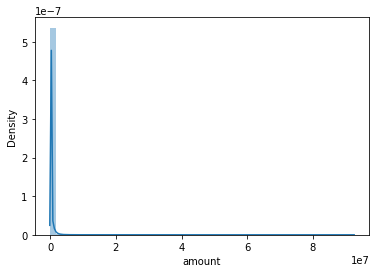

In [24]:
warnings.filterwarnings('ignore')
ax = sns.distplot(df['amount'])

<AxesSubplot:>

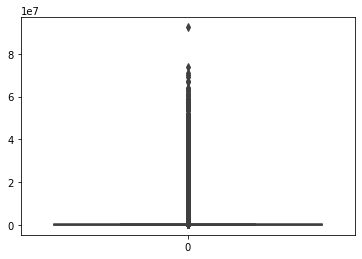

In [25]:
sns.boxplot(data=df['amount'], saturation=.3)

# Correcting the dataset

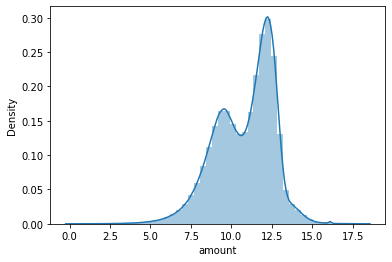

In [26]:
warnings.filterwarnings('ignore')
amount_corrected= np.log(df['amount' ]+1)
ax = sns.distplot(amount_corrected)

# Relationship of IsFraud with all other variables

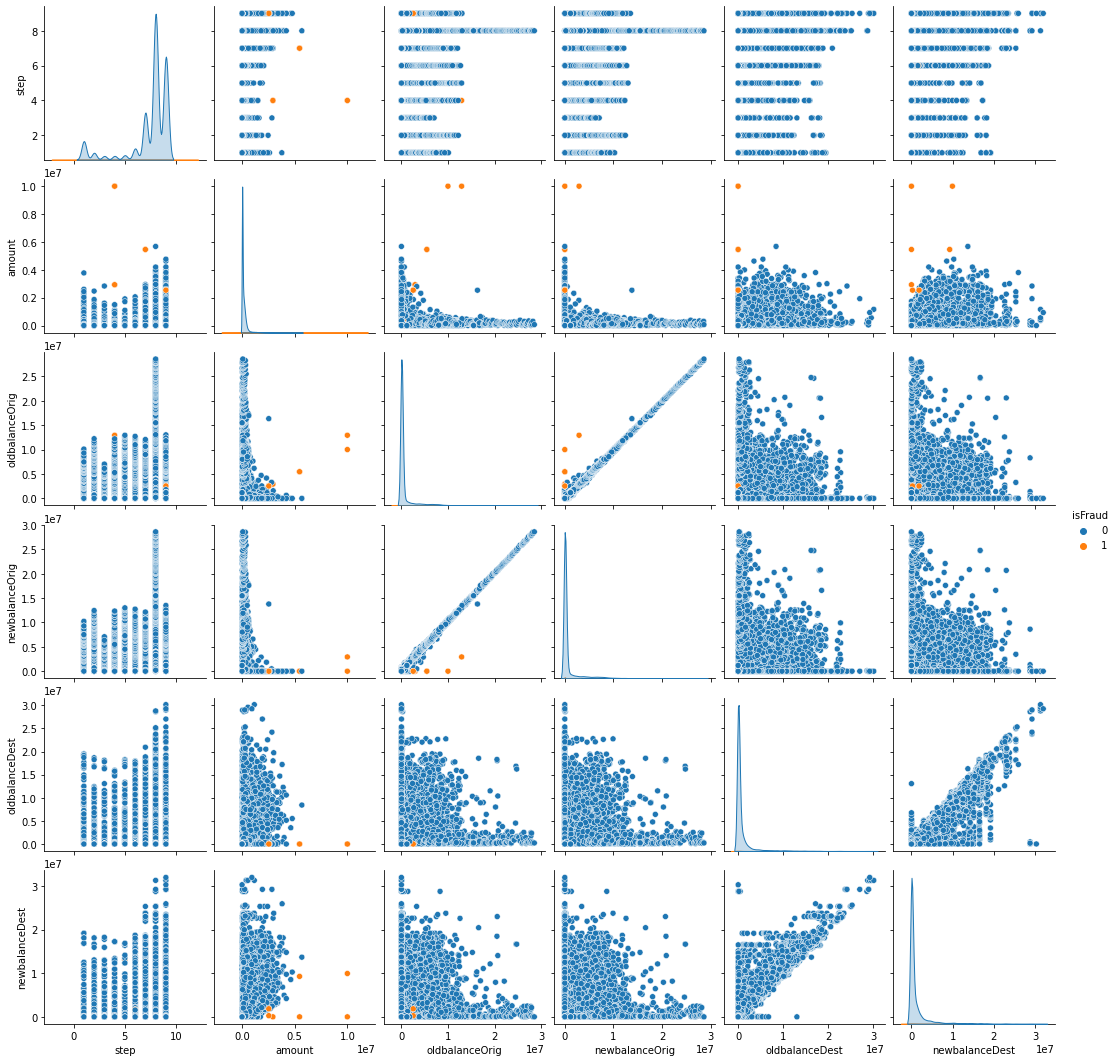

In [27]:
sns.pairplot(df.iloc[0:50000], hue= 'isFraud')

In [28]:
y = pd.get_dummies(df.type)

In [29]:
print(y)

         CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER
0              0         0      0        1         0
1              0         0      0        1         0
2              0         0      0        0         1
3              0         1      0        0         0
4              0         0      0        1         0
...          ...       ...    ...      ...       ...
6351188        0         0      0        0         1
6351189        0         1      0        0         0
6351190        0         0      0        0         1
6351191        0         1      0        0         0
6351192        0         0      1        0         0

[6351193 rows x 5 columns]


# One-hot Encoding

In [30]:
df = df.drop('type',axis = 1)
df = df.join(y)
df  

,step,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6351188,699,162326.52,C1557504343,162326.52,0.00,C404511346,0.00,0.00,1,0,0,0,0,1
6351189,699,162326.52,C1532317723,162326.52,0.00,C446134087,0.00,162326.52,1,0,1,0,0,0
6351190,699,2763398.31,C577803442,2763398.31,0.00,C619602282,0.00,0.00,1,0,0,0,0,1
6351191,699,2763398.31,C1491503658,2763398.31,0.00,C454424230,339515.35,3102913.66,1,0,1,0,0,0


# Correlation Matrix

<AxesSubplot:>

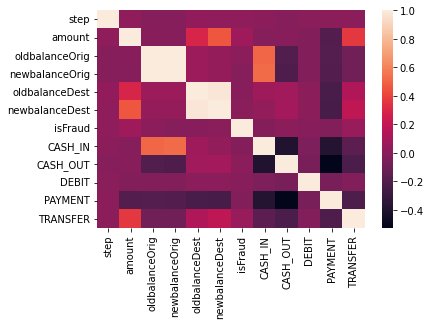

In [31]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

# Define independent variables

In [32]:
independent = df[['step','amount','oldbalanceOrig','newbalanceOrig','oldbalanceDest','newbalanceDest','CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER']]
independent

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6351188,699,162326.52,162326.52,0.00,0.00,0.00,0,0,0,0,1
6351189,699,162326.52,162326.52,0.00,0.00,162326.52,0,1,0,0,0
6351190,699,2763398.31,2763398.31,0.00,0.00,0.00,0,0,0,0,1
6351191,699,2763398.31,2763398.31,0.00,339515.35,3102913.66,0,1,0,0,0


# Defining dependent variable

In [33]:
dependent = df['isFraud']
dependent

0          0
1          0
2          1
3          1
4          0
          ..
6351188    1
6351189    1
6351190    1
6351191    1
6351192    0
Name: isFraud, Length: 6351193, dtype: int64

# Splitting between training and testing dataset

In [34]:
independent_train, independent_test, dependent_train, dependent_test = train_test_split(independent, dependent, test_size=0.3, random_state=1)

In [35]:
independent_train

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
44514,9,115023.80,8965563.95,9080587.75,218899.09,103875.29,1,0,0,0,0
4288663,307,21138.18,0.00,0.00,0.00,0.00,0,0,0,1,0
4488634,324,86768.77,10763.00,97531.77,156001.71,69232.93,1,0,0,0,0
2454086,203,73944.65,7502560.40,7576505.05,392070.97,473257.16,1,0,0,0,0
3883888,283,90612.51,701198.00,610585.49,0.00,90612.51,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5030793,354,156973.09,257335.00,100361.91,6697137.26,6854110.35,0,1,0,0,0
491263,19,140745.33,0.00,0.00,1880641.65,2021386.98,0,1,0,0,0
3937352,286,128095.40,0.00,0.00,8557281.75,8685377.15,0,1,0,0,0
4686059,331,5504.70,0.00,0.00,0.00,0.00,0,0,0,1,0


In [36]:
independent_test

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1671337,158,193015.65,7734285.28,7927300.93,631660.66,438645.01,1,0,0,0,0
1033202,93,365923.77,0.00,0.00,777972.82,1143896.59,0,1,0,0,0
2856296,227,16469.83,0.00,0.00,0.00,0.00,0,0,0,1,0
2311535,188,178235.13,10046.00,0.00,1028428.99,1206664.12,0,1,0,0,0
3958379,289,529826.60,0.00,0.00,569878.10,1099704.70,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15200,8,149098.18,30730.00,179828.18,0.00,1014751.42,1,0,0,0,0
3527647,259,35063.42,40027.00,75090.42,82554.07,47490.65,1,0,0,0,0
3028336,233,16705.09,0.00,0.00,0.00,0.00,0,0,0,1,0
2107498,183,6827.53,0.00,0.00,0.00,0.00,0,0,0,1,0


In [37]:
dependent_train

44514      0
4288663    0
4488634    0
2454086    0
3883888    0
          ..
5030793    0
491263     0
3937352    0
4686059    0
4322341    0
Name: isFraud, Length: 4445835, dtype: int64

In [38]:
dependent_test

1671337    0
1033202    0
2856296    0
2311535    0
3958379    0
          ..
15200      0
3527647    0
3028336    0
2107498    0
4800936    0
Name: isFraud, Length: 1905358, dtype: int64

# Building model RandomForest algorithm

In [39]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(independent_train, dependent_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [40]:
dependent_pred= classifier.predict(independent_test)  

# Confusion matrix to check accuracy

[[1902997      46]
 [    533    1782]]


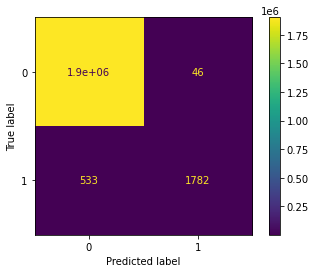

In [44]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay  
cm= confusion_matrix(dependent_test, dependent_pred) 
print(cm)
ConfusionMatrixDisplay(cm).plot()

# Accuracy Score

In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(dependent_test, dependent_pred))

0.9996961200992149


# Classification Report

In [46]:
from sklearn.metrics import classification_report
print(classification_report(dependent_test, dependent_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1903043
           1       0.97      0.77      0.86      2315

    accuracy                           1.00   1905358
   macro avg       0.99      0.88      0.93   1905358
weighted avg       1.00      1.00      1.00   1905358



# ROC Curve

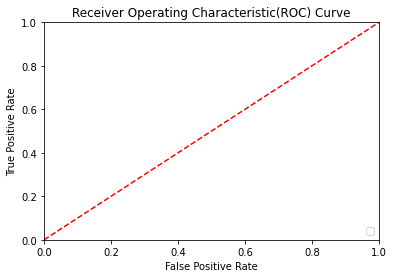

In [51]:
from sklearn.metrics import roc_curve
import logging
logging.getLogger().setLevel(logging.CRITICAL)
fpr,tpr,thresold=roc_curve(dependent_test,dependent_pred, pos_label=2)
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()